In [1]:
%load_ext autoreload
%autoreload 2

#%config IPCompleter.greedy=True

# Rotation curves

First, imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from astropy import units
from pathlib import Path
import os
import astropy.units as u
from astropy.constants import G

import snapshot_obj 
import dataset_compute
import trace_halo
import curve_fit

import importlib

In [36]:
importlib.reload(snapshot_obj)
importlib.reload(curve_fit)
importlib.reload(dataset_compute)

<module 'dataset_compute' from '/home/kassiili/Curvaton_Simulations/analysis/dataset_compute.py'>

## Get data

In [32]:
# Which halo:
gn = 2; sgn = 8

# Get LCDM data:
snap_pres = snapshot_obj.Snapshot("CDM_V1_LR",127)

In [33]:
# Trace halo:
step = 4
stop = 101
tracer = trace_halo.trace_halo(snap_pres,gn,sgn,direction='backwards',stop=stop)

find match for: 2.0 8.0  in  126
idx= 68
idx= 69
idx= 67
find match for: 2.0 7.0  in  125
idx= 66
find match for: 2.0 7.0  in  124
idx= 61
idx= 62
idx= 60
find match for: 2.0 6.0  in  123
idx= 56
idx= 57
find match for: 2.0 7.0  in  122
idx= 61
idx= 62
idx= 60
find match for: 2.0 6.0  in  121
idx= 56
idx= 57
idx= 55
find match for: 2.0 5.0  in  120
idx= 52
find match for: 2.0 5.0  in  119
idx= 50
find match for: 2.0 5.0  in  118
idx= 54
find match for: 2.0 5.0  in  117
idx= 55
find match for: 2.0 5.0  in  116
idx= 61
idx= 62
find match for: 2.0 6.0  in  115
idx= 57
idx= 58
find match for: 2.0 7.0  in  114
idx= 57
idx= 58
idx= 56
idx= 59
idx= 55
idx= 60
idx= 54
idx= 61
idx= 53
idx= 62
idx= 52
idx= 63
idx= 51
idx= 64
idx= 50
idx= 65
idx= 49
idx= 66
idx= 48
idx= 67
idx= 47
idx= 68
idx= 46
idx= 69
idx= 45
idx= 70
idx= 44
idx= 71
idx= 43
idx= 72
idx= 42
idx= 73
idx= 41
idx= 74
idx= 40
idx= 75
idx= 39
idx= 76
idx= 38
idx= 77
idx= 37
idx= 78
idx= 36
idx= 79
idx= 35
idx= 80
idx= 34
idx= 81
idx

In [37]:
# Compute rotation curves:

rotationCurves = {}
reduced = { key : val for key,val in tracer.items() \
         if key in range(127,127-len(tracer)+1,-step)}
for snapID,data in reduced.items():
#    if snapID == 115 or snapID == 103:
#        continue
    z = data[0]; gn = data[1]; sgn = data[2]
    snap = snapshot_obj.Snapshot("CDM_V1_LR",snapID)
    
    # Read halo:
    fnum = snap.file_of_halo(gn,sgn)
    SGNs = snap.get_subhalos("SubGroupNumber",fnums=[fnum])
    GNs = snap.get_subhalos("GroupNumber",fnums=[fnum])
    
    vmax = snap.get_subhalos("Vmax",fnums=[fnum]) / 100000 
                                                        # cm/s to km/s 
    rmax = snap.get_subhalos("VmaxRadius",fnums=[fnum]) \
                * u.cm.to(u.kpc)
    
    # Select halo:
    halo_mask = np.logical_and(SGNs == sgn,GNs == gn)
    vmax = vmax[halo_mask]
    rmax = rmax[halo_mask]
    
    # Rotation curve:
    print(snapID)
    r, v_circ = dataset_compute.compute_rotation_curve(snap, gn, sgn)
    r = r * u.cm.to(u.kpc)
    v_circ = v_circ * u.cm.to(u.km)
    rotationCurves[snapID] = (r,v_circ,z)

127
123
119
115
111
107
103


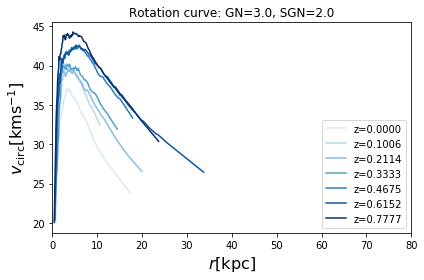

In [38]:
fig, axes = plt.subplots()

# Set axes:
#axes.set_xscale('log')
#axes.set_yscale('log')
axes.set_xlim(0,80)
#axes.set_ylim(y_down,y_up)

# Set labels:
axes.set_xlabel('$r[\mathrm{kpc}]$', fontsize=16)
axes.set_ylabel('$v_{\mathrm{circ}}[\mathrm{kms^{-1}}]$', fontsize=16)

# Galaxy text:
axes.set_title('Rotation curve: GN={}, SGN={}'.format(gn,sgn))

step = 4
toolight = int(len(rotationCurves)/4)
colors = plt.cm.Blues(np.linspace(0,1,len(rotationCurves) + toolight))[toolight:]

for i,xy in enumerate(rotationCurves.values()):
    axes.plot(xy[0], xy[1], label='z={:06.4f}'.format(xy[2]), c=colors[i])
    
plt.legend(loc='lower right')
plt.tight_layout()